<a href="https://colab.research.google.com/github/KESHAVBERG/detections/blob/main/classify_images_of_flowers_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [135]:
import os
import pathlib

import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import tensorflow as tf
import PIL

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential



In [136]:
import pathlib
dataset_url = "https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"
data_dir = tf.keras.utils.get_file('flower_photos', origin=dataset_url, untar=True)
data_dir = pathlib.Path(data_dir)

In [137]:
roses = list(data_dir.glob('roses/*'))
tulips = list(data_dir.glob('tulips/*'))


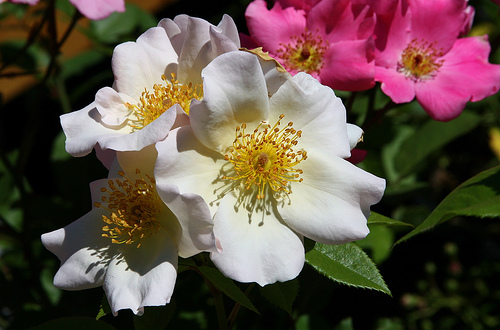

In [138]:
PIL.Image.open(str(roses[3]))

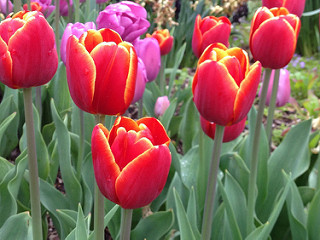

In [139]:
PIL.Image.open(str(tulips[3]))

In [140]:
batch_size = 32
img_height = 180
img_width = 180

In [141]:
train_data = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir,
    validation_split = 0.2,
    subset = "training",
    seed = 123,
    image_size =(img_height, img_width),
    batch_size = batch_size
)

Found 3670 files belonging to 5 classes.
Using 2936 files for training.


In [142]:
val_data = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir,
    validation_split = 0.2,
    subset = "validation",
    seed = 123,
    image_size = (img_height,img_width),
    batch_size = batch_size
)

Found 3670 files belonging to 5 classes.
Using 734 files for validation.


In [143]:
classes = train_data.class_names
print(classes)

['daisy', 'dandelion', 'roses', 'sunflowers', 'tulips']


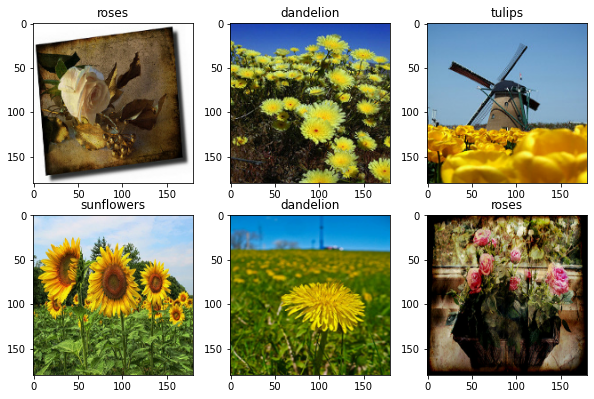

In [144]:
plt.figure(figsize=(10,10))
for img,labels in train_data.take(1):
  for i in range(6):
    ax = plt.subplot(3,3,i+1)
    plt.imshow(img[i].numpy().astype("uint8"))
    plt.title(classes[labels[i]])



In [145]:
for ib, lb in train_data:
  print(ib.shape)
  print(lb.shape)
  break
  

(32, 180, 180, 3)
(32,)


In [146]:
AUTOTUNE = tf.data.AUTOTUNE

train_data = train_data.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_data = val_data.cache().prefetch(buffer_size=AUTOTUNE)

In [147]:
normal_layer = layers.experimental.preprocessing.Rescaling(1./255)

In [148]:
model = Sequential([
layers.experimental.preprocessing.Rescaling(1./255,input_shape=(img_height,img_width,3)),
layers.Conv2D(16,3,padding='same',activation='relu'),
layers.MaxPool2D(),
layers.Conv2D(32,3,padding='same',activation='relu'),
layers.MaxPool2D(),
layers.Conv2D(64,3,padding='same',activation='relu'),
layers.Flatten(),
layers.Dense(128,activation='relu'),
layers.Dense(len(classes))
])

In [149]:
model.compile(
    optimizer = 'adam',
    loss = tf.keras.losses.SparseCategoricalCrossentropy(),
    metrics = ['accuracy']
)

In [150]:
epochs=10
history = model.fit(
  train_data,
  validation_data=val_data,
  epochs=epochs
)

Epoch 1/10
92/92 [==============================] - 9s 36ms/step - loss: 7.0848 - accuracy: 0.2284 - val_loss: 7.2692 - val_accuracy: 0.2398
Epoch 2/10
92/92 [==============================] - 2s 22ms/step - loss: 6.7081 - accuracy: 0.2570 - val_loss: 7.2692 - val_accuracy: 0.2398
Epoch 3/10
92/92 [==============================] - 2s 22ms/step - loss: 7.0420 - accuracy: 0.2409 - val_loss: 7.2692 - val_accuracy: 0.2398
Epoch 4/10
92/92 [==============================] - 2s 22ms/step - loss: 6.6509 - accuracy: 0.2571 - val_loss: 7.2692 - val_accuracy: 0.2398
Epoch 5/10
92/92 [==============================] - 2s 22ms/step - loss: 6.9876 - accuracy: 0.2356 - val_loss: 7.2692 - val_accuracy: 0.2398
Epoch 6/10
92/92 [==============================] - 2s 22ms/step - loss: 6.9466 - accuracy: 0.2419 - val_loss: 7.2692 - val_accuracy: 0.2398
Epoch 7/10
92/92 [==============================] - 2s 23ms/step - loss: 6.9106 - accuracy: 0.2462 - val_loss: 7.2692 - val_accuracy: 0.2398
Epoch 8/10
92

In [151]:
epochs_range = range(epochs)


In [152]:
acc = history.history['accuracy'],
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

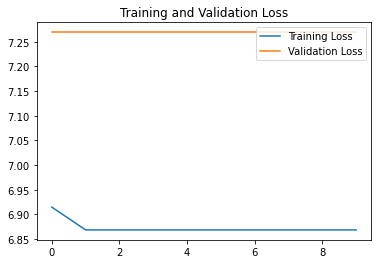

In [153]:
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

***DAta augmentation***

In [154]:
data_ag = keras.Sequential([
     layers.experimental.preprocessing.RandomFlip("horizontal",input_shape=(img_height,img_width,3)),
     layers.experimental.preprocessing.RandomRotation(0.1),
     layers.experimental.preprocessing.RandomZoom(0.1),
   ])

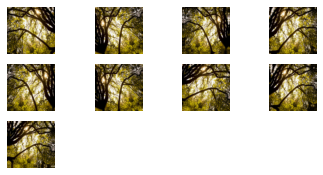

In [155]:
for img,_ in train_data.take(1):
  for i in range(9):
    agumented = data_ag(img)
    ax = plt.subplot(4, 4, i + 1)
    plt.imshow(agumented[0].numpy().astype("uint8"))
    plt.axis("off")


In [156]:
model = Sequential(
    [
     data_ag,
     layers.experimental.preprocessing.Rescaling(1./255),
     layers.Conv2D(16,3,padding='same',activation='relu'),
     layers.MaxPool2D(),
     layers.Conv2D(32,3,padding='same',activation='relu'),
     layers.MaxPool2D(),
     layers.Conv2D(64,3,padding='same',activation='relu'),
     layers.MaxPool2D(),
     layers.Dropout(0.2),
     layers.Flatten(),
     layers.Dense(128,activation='relu'),
     layers.Dense(len(classes))
   ]
) 

In [157]:
model.compile(
    optimizer = 'adam',
    loss = tf.keras.losses.SparseCategoricalCrossentropy(),
    metrics = ['accuracy']
    
              )

In [158]:
his = model.fit(
 
    train_data,
    validation_data = val_data,
    epochs = 10,

)

Epoch 1/10
92/92 [==============================] - 3s 28ms/step - loss: 2.6871 - accuracy: 0.1976 - val_loss: 1.6094 - val_accuracy: 0.2071
Epoch 2/10
92/92 [==============================] - 2s 26ms/step - loss: 1.6094 - accuracy: 0.1957 - val_loss: 1.6094 - val_accuracy: 0.2071
Epoch 3/10
92/92 [==============================] - 2s 26ms/step - loss: 1.6094 - accuracy: 0.1844 - val_loss: 1.6094 - val_accuracy: 0.2071
Epoch 4/10
92/92 [==============================] - 2s 26ms/step - loss: 1.6094 - accuracy: 0.1730 - val_loss: 1.6094 - val_accuracy: 0.2071
Epoch 5/10
92/92 [==============================] - 2s 26ms/step - loss: 1.6094 - accuracy: 0.1874 - val_loss: 1.6094 - val_accuracy: 0.2071
Epoch 6/10
92/92 [==============================] - 2s 26ms/step - loss: 1.6094 - accuracy: 0.1865 - val_loss: 1.6094 - val_accuracy: 0.2071
Epoch 7/10
92/92 [==============================] - 2s 26ms/step - loss: 1.6094 - accuracy: 0.1908 - val_loss: 1.6094 - val_accuracy: 0.2071
Epoch 8/10
92

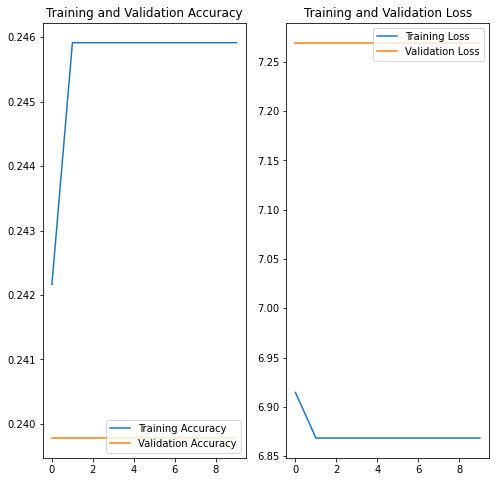

In [159]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [164]:
url = "https://storage.googleapis.com/download.tensorflow.org/example_images/592px-Red_sunflower.jpg"
path_ = tf.keras.utils.get_file('Red_sunflower', origin=sunflower_url)
img = keras.preprocessing.image.load_img(path_,target_size=(img_height,img_width))
img_array = keras.preprocessing.image.img_to_array(img)
img_array = tf.expand_dims(img_array,0)
predictions = model.predict(img_array)
score = tf.nn.softmax(predictions[0])

In [167]:
print("this may brlog to {} with a {:.2f}% acc".format(classes[np.argmax(score)],100*np.max(score)))

this may brlog to sunflowers with a 99.99% acc
